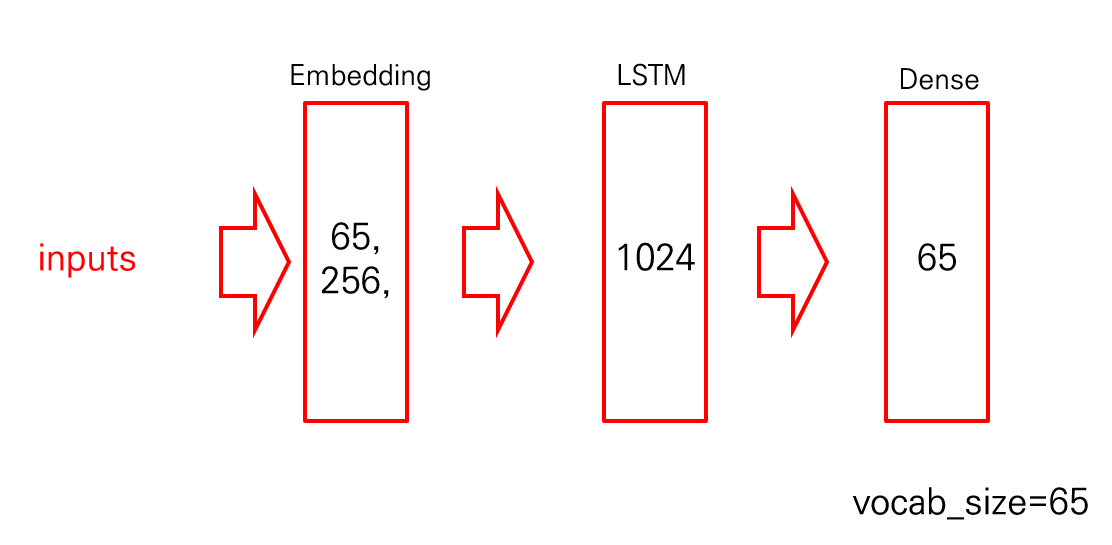

In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                         batch_input_shape=[batch_size, None]),
        layers.LSTM(rnn_units, return_sequences=True, stateful=True, 
                    recurrent_initializer='glorot_uniform'),
        layers.Dense(vocab_size)
    ])
    return model

In [7]:
from tensorflow.keras import utils
path_to_file = utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [8]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

In [10]:
len(text)

1115394

In [13]:
vocab = sorted(set(text))
print(vocab, len(vocab))

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] 65


In [14]:
vocab_size = len(vocab) # 65
embedding_dim = 256 #임베딩차원

In [15]:
model = build_model(vocab_size=vocab_size, embedding_dim=embedding_dim,
                    rnn_units=1024, batch_size=64)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 65)            66625     
                                                                 
Total params: 5330241 (20.33 MB)
Trainable params: 5330241 (20.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import numpy as np
idx2char = np.array(vocab)
char2idx = {c: i for i, c in enumerate(vocab)}
print(char2idx)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


In [24]:
text_as_int = np.array([char2idx[c] for c in text])

In [32]:
print(text_as_int) # 텍스트를 숫자로 바꾼 데이터 출력해 봄
print(text[:3], text[-3:])

[18 47 56 ... 45  8  0]
Fir g.



In [34]:
# 입력 시퀀스를 만들고 배치 데이터 생성
import tensorflow as tf

# 시퀀스의 길이는 100으로 임의로 지정
seq_length = 100
examples_per_epoch = len(text) // seq_length
print(examples_per_epoch)

11153


In [36]:
# 학습을 위한 샘플 및 타겟 생성
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
print(char_dataset)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
print(sequences)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
<_BatchDataset element_spec=TensorSpec(shape=(101,), dtype=tf.int32, name=None)>


In [37]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [39]:
dataset = sequences.map(split_input_target)
print(dataset)
dataset = dataset.shuffle(11500).batch(64, drop_remainder=True)
print(dataset)

<_MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int32, name=None), TensorSpec(shape=(64, 100), dtype=tf.int32, name=None))>


In [40]:
def loss(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

model.compile(loss=loss, optimizer='adam')

In [41]:
history = model.fit(dataset, epochs=100)

Epoch 1/100
172/172 [==============================] - 262s 2s/step - loss: 2.5984
Epoch 2/100
172/172 [==============================] - 225s 1s/step - loss: 1.8970
Epoch 3/100
172/172 [==============================] - 243s 1s/step - loss: 1.6459
Epoch 4/100
172/172 [==============================] - 224s 1s/step - loss: 1.5074
Epoch 5/100
172/172 [==============================] - 223s 1s/step - loss: 1.4241
Epoch 6/100
172/172 [==============================] - 201s 1s/step - loss: 1.3670
Epoch 7/100
172/172 [==============================] - 215s 1s/step - loss: 1.3214
Epoch 8/100
172/172 [==============================] - 205s 1s/step - loss: 1.2814
Epoch 9/100
172/172 [==============================] - 201s 1s/step - loss: 1.2452
Epoch 10/100
172/172 [==============================] - 200s 1s/step - loss: 1.2094
Epoch 11/100
172/172 [==============================] - 203s 1s/step - loss: 1.1732
Epoch 12/100
172/172 [==============================] - 200s 1s/step - loss: 1.1368
E

KeyboardInterrupt: 

In [44]:
def generate_text(model, start_string, num_generate=300, temperature=1.0):
    # 추론 모델을 정의해야 함
    model_for_inference = build_model(vocab_size, embedding_dim, 1024, batch_size=1)
    # 현재 학습된 모델의 파라미터를 추론 모델에 set
    model_for_inference.set_weights(model.get_weights())
    model_for_inference.reset_states()

    input_data = [char2idx[c] for c in start_string] # 입력 문장을 숫자 리스트로
    input_data = tf.expand_dims(input_data, 0)

    text_generated = []
    # 추론 모델을 이용해서 예
    for i in range(num_generate):
        predictions = model_for_inference(input_data) # 예측 생성
        predictions = tf.squeeze(predictions, 0) # 차원을 축소해서 불필요한 차원을 제거
        # 예측의 분포를 조절. 온도가 낮으면 더 결정적인 예측, 온도가 높으면 무작위적인 예측
        predictions = predictions / temperature
        # 샘플링된 다음 문자의 인덱스
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy() 
        input_data = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])
        
    return ''.join(text_generated)

In [45]:
input_text = input("로미오와 줄리엣 소설의 문장을 입력하세요.")
output = generate_text(model, input_text)
print(output)

로미오와 줄리엣 소설의 문장을 입력하세요. Confess yourselves wondrous malicious


,
Even Citizens and amin cook, the time were weary,
ng, to take the balm on better than:
I go; I may believe my son.

GLOUCESTER:
But say, what blood are honesty to you!
As for their intercession; and these unjust;
And if it were a syifled bold to tual;
And thus for him, I hope of this aid:
Besides,
